## Breast Cancer Classification - Support Vector Machine

Task:

Write a SVM classification algorithmen for the breast cancer dataset. There are two classes for prediction, namely malignant or benign cancer cells.

Assume the dataset to be clean and ready for usage.

In [17]:
# Basic Python Libs
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from matplotlib import style

In [18]:
def sklearn_dataset_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df


def plot_coefficients(classifier, feature_names, top_features=10):
    clf_coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(clf_coef)[-top_features:]
    top_negative_coefficients = np.argsort(clf_coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(15, 8))
    colors = ['red' if c < 0 else 'blue' for c in clf_coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), clf_coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 0.5 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.ylabel('Vector Length')
    plt.show()

The data has 569 diagnosis, 357 malignant and 212 benign.


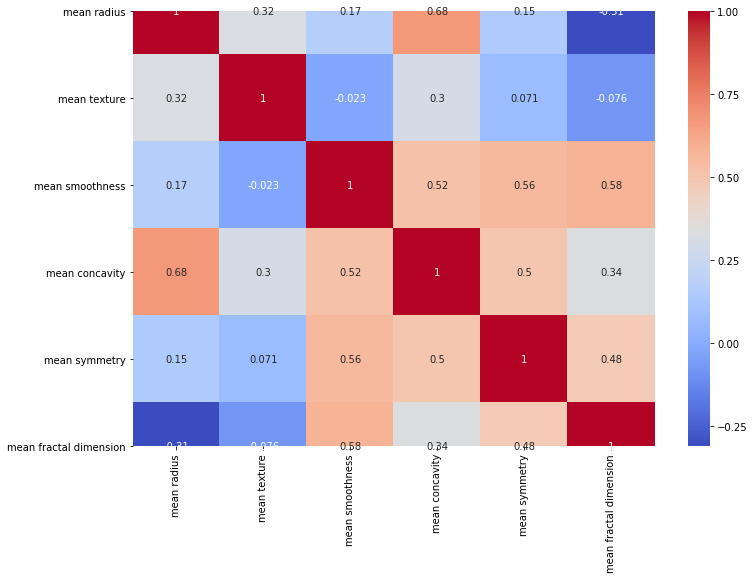

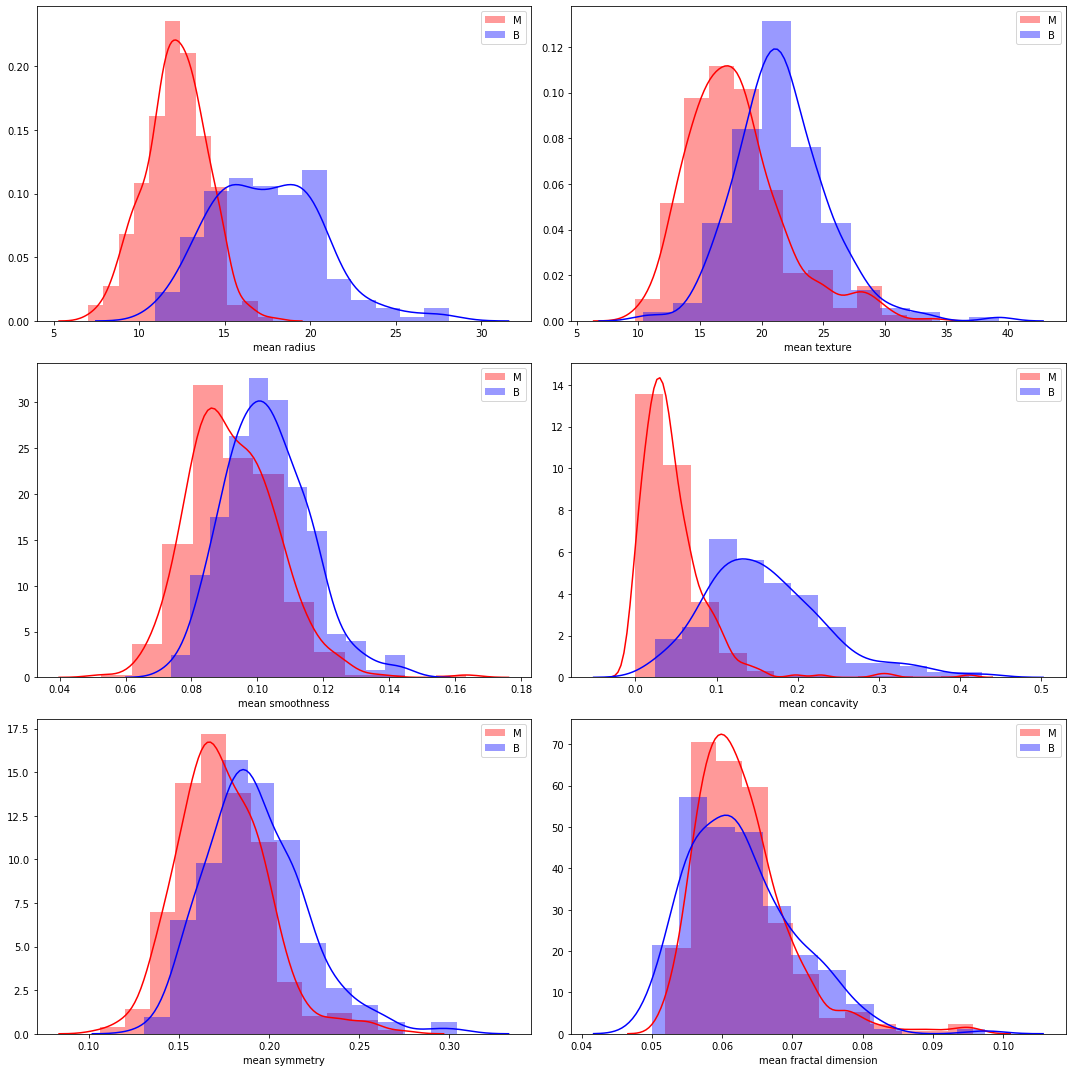

Accuracy: (91.76 +/- 3.42) %


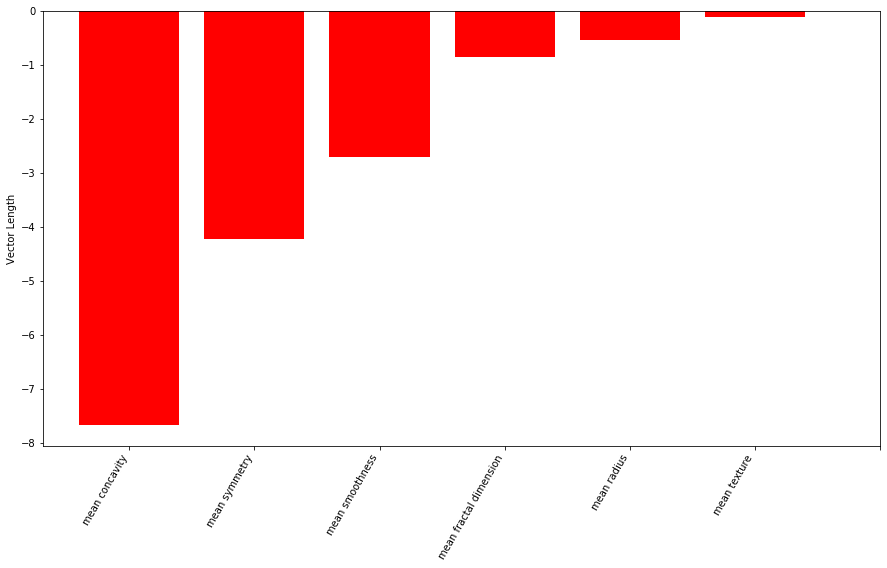

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        57
           1       0.94      0.96      0.95       114

    accuracy                           0.94       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

Area under ROC-Curve: 0.921


In [19]:
df = sklearn_dataset_to_df(datasets.load_breast_cancer())

diagnosis_all = list(df.shape)[0]
diagnosis_categories = list(df['target'].value_counts())

print("The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all,
                                                                      diagnosis_categories[0],
                                                                      diagnosis_categories[1]))

feature_list = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                'mean smoothness', 'mean compactness', 'mean concavity',
                'mean concave points', 'mean symmetry', 'mean fractal dimension',
                'radius error', 'texture error', 'perimeter error', 'area error',
                'smoothness error', 'compactness error', 'concavity error',
                'concave points error', 'symmetry error', 'fractal dimension error',
                'worst radius', 'worst texture', 'worst perimeter', 'worst area',
                'worst smoothness', 'worst compactness', 'worst concavity',
                'worst concave points', 'worst symmetry', 'worst fractal dimension',
                'target']
train_list = ['mean radius', 'mean texture', 'mean smoothness', 
              'mean concavity', 'mean symmetry', 'mean fractal dimension'
              ]
target_feature = 'target'

plt.figure(figsize=(12,8))
sns.heatmap(df[train_list].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

bins = 12
plt.figure(figsize=(15, 15))
for i, feature in enumerate(train_list):
    rows = int(len(train_list) / 2)
    plt.subplot(rows, 2, i + 1)
    sns.distplot(df[feature][df['target'] == 1], bins=bins, color='red', label='M');
    sns.distplot(df[feature][df['target'] == 0], bins=bins, color='blue', label='B');
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

X = np.array(df[train_list])
y = np.array(df[target_feature])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = svm.SVC(kernel='linear', C=4, degree=3, verbose=False)
scores = cross_val_score(clf, X, y, cv=10)
print("Accuracy: (%0.2f +/- %0.2f)" % (scores.mean()*100, scores.std()*100), "%")

clf.fit(X_train, y_train)
plot_coefficients(clf, train_list, top_features=3)
y_predict = clf.predict(X_test)
print(metrics.classification_report(y_test, y_predict))
roc_auc = metrics.roc_auc_score(y_test, y_predict)
print("Area under ROC-Curve: {0:.3f}".format(roc_auc))